## Online Resource 5
Plotting of the main map, the clustering tree and the sub-mappings for the clustering-report

In [1]:
import pandas as pd
%load_ext rpy2.ipython

import numpy as np

In [2]:
drc = pd.read_csv('drcend.csv')

In [3]:
df = pd.DataFrame([drc["cluster"],drc["x"],drc["y"]]).transpose()
display(df)

,cluster,x,y
0,20.0,-6.494468,-1.383022
1,-1.0,6.364085,-12.241986
2,3.0,-4.340114,7.305923
3,-1.0,-9.169416,13.823768
4,20.0,-7.900375,-3.140768
5,16.0,-2.765642,-15.021323
6,17.0,-2.099419,-11.815221
7,14.0,7.839121,6.671455
8,9.0,14.666098,3.976736
9,9.0,12.848328,2.406140


## Plot the main graphic in two layers

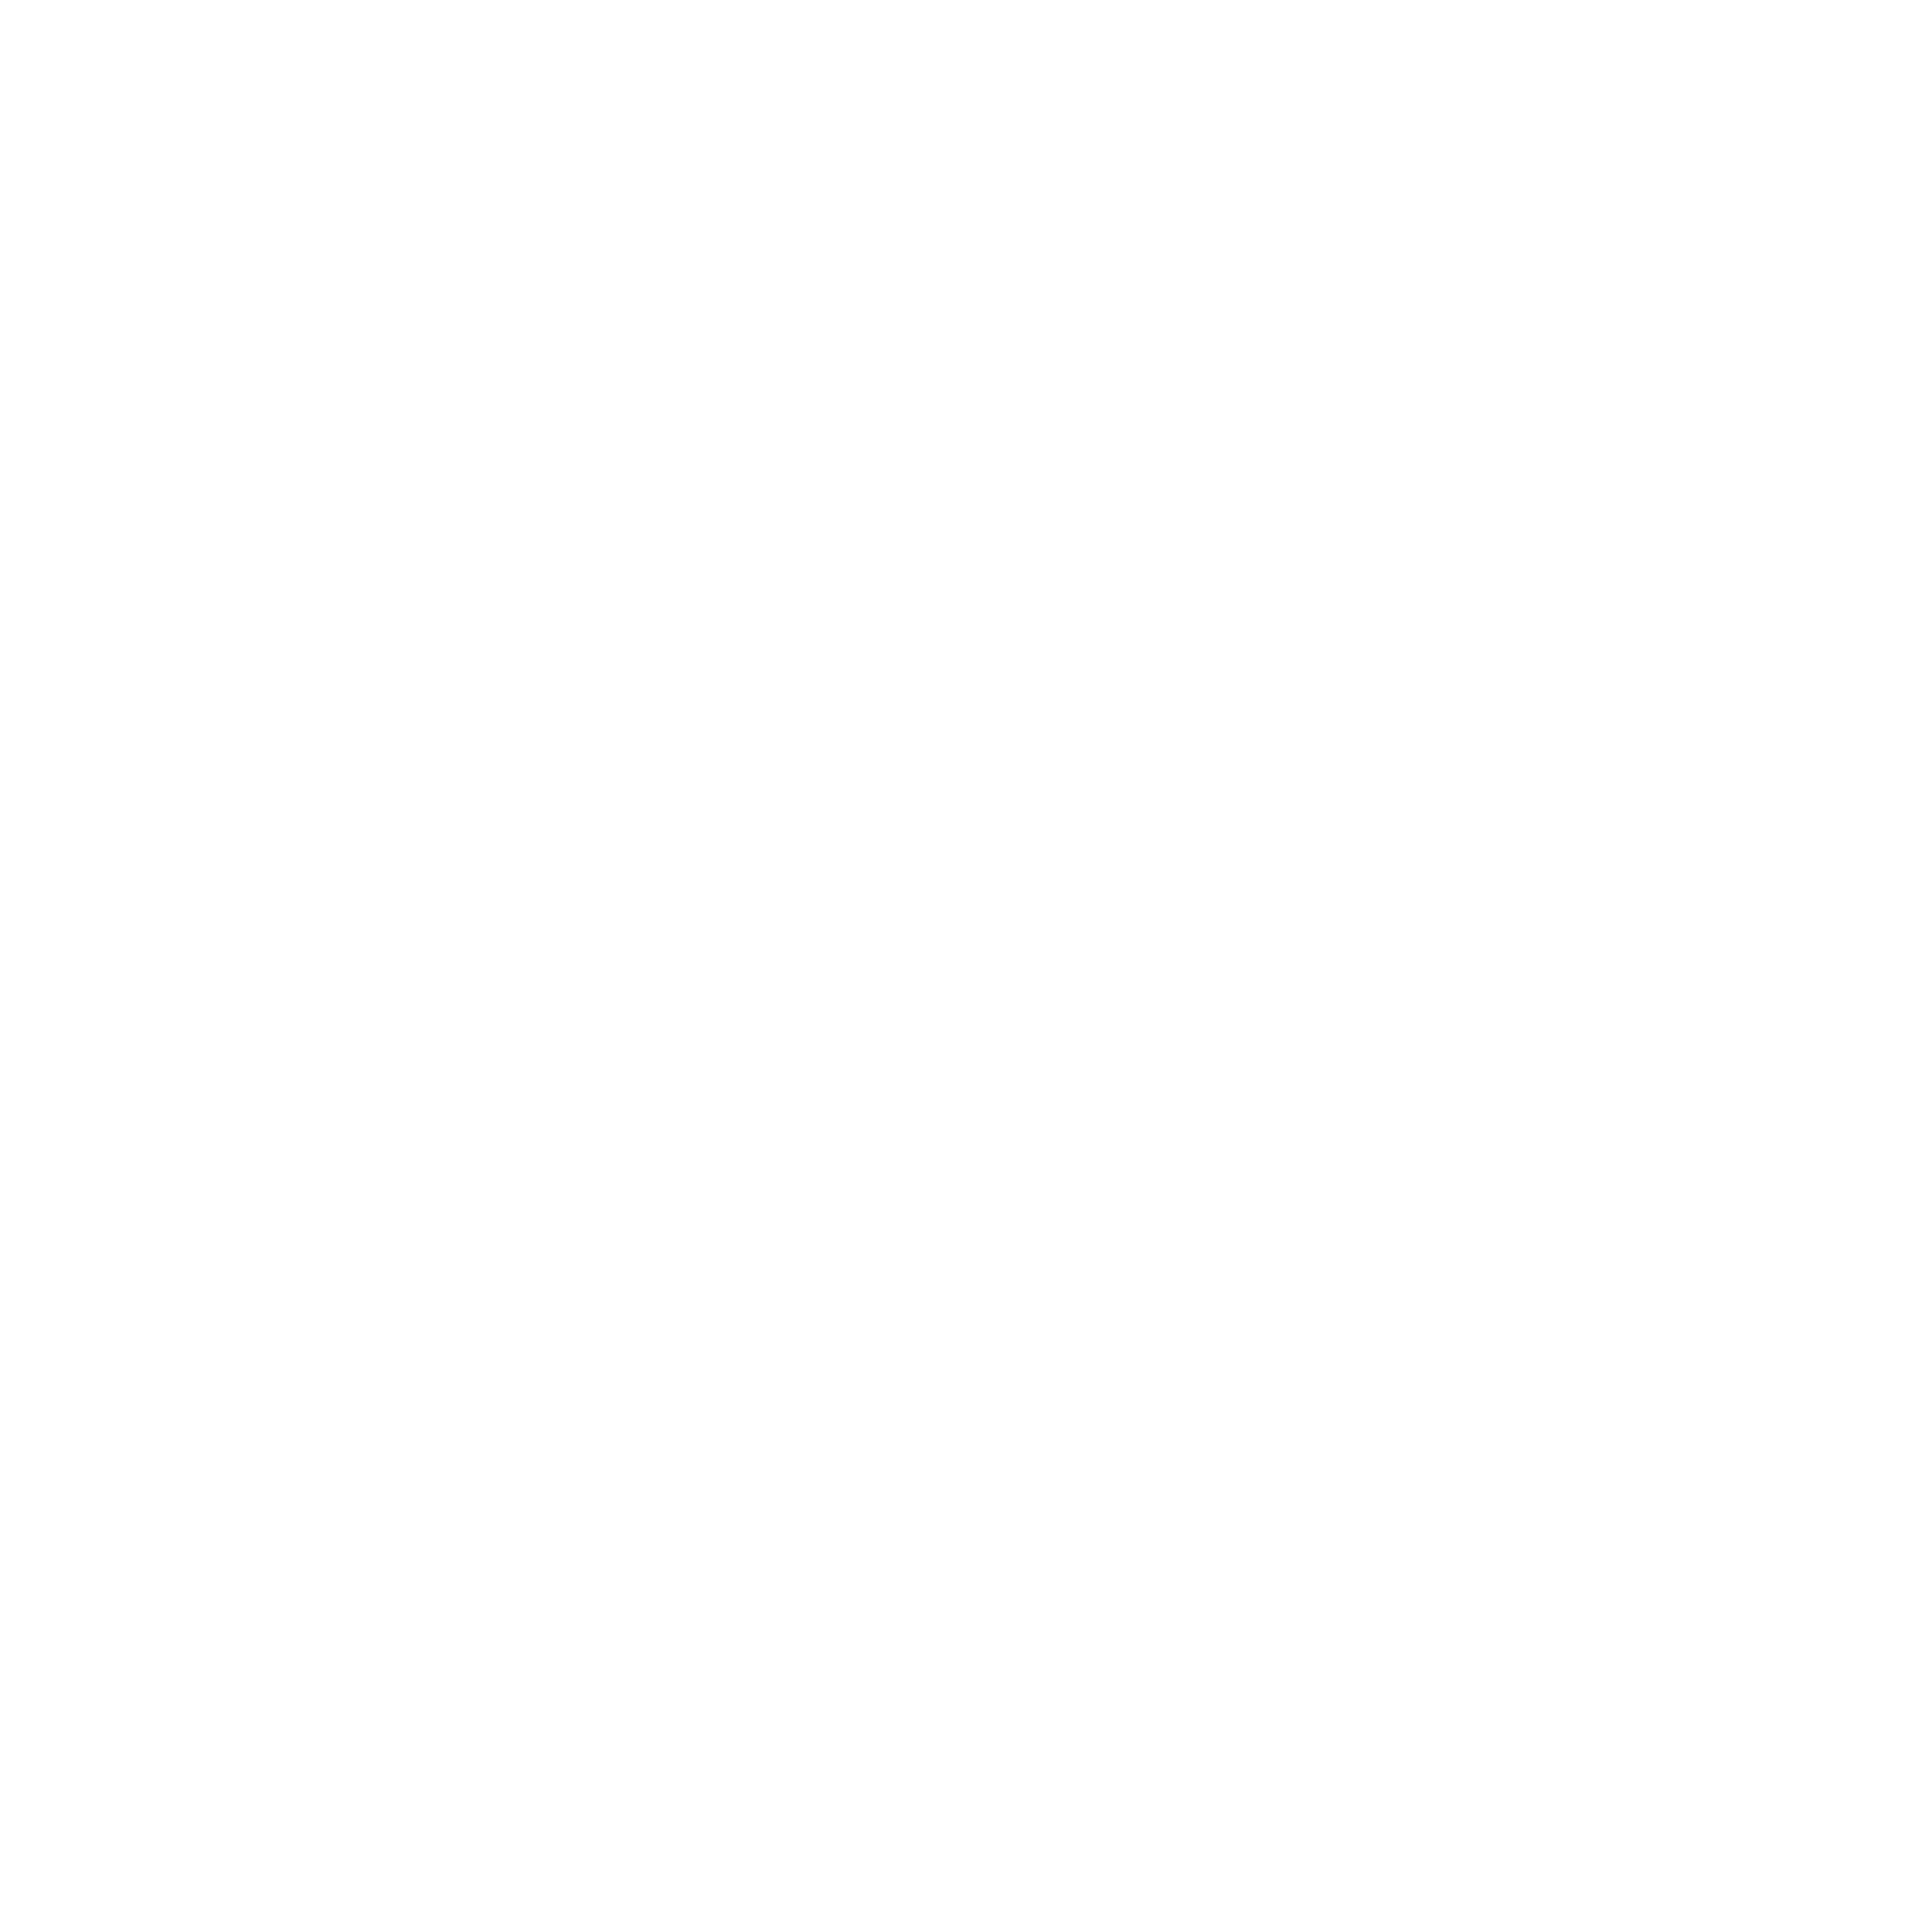

In [77]:
%%R -i df -o myNewColors --bg #fbf8f1 -h 4000 -w 4000 
library(hrbrthemes)
library(ggplot2)
library(fields)
# library(ggrepel)
library(ggforce)
install.packages('svglite')
library(ggalt)
library(stringr)

means <- aggregate(df[,c("x","y")], list(df$cluster), mean)
means <- data.frame(means)

n=nrow(means)
means <- means[-1,]

s <- n-1
myGray <- c('#95a5a6')
myNewColors <- c('#2E6697', '#9B2006', '#D23310', '#C23E45', '#928151', '#C35E03', '#43A209', '#CA5A4E', '#61A801', '#269B11', '#ED9A1A', '#854154', '#575377', '#A71A83', '#3366CC', '#9B1109', '#605295', '#6636C6', '#0C8BB9', '#66873A', '#1395B5', '#EB9C01', '#218E17', '#7B5891', '#B6220C', '#B42F30', '#8E3F5F', '#665F80', '#AD4E13', '#B17B2D', '#1D78A8', '#DD6511', '#AAAA11', '#676E15', '#A8167A', '#628871')
# sample(pal(s))
myPal <- append(myGray,myNewColors)

df$density <- fields::interp.surface(
  MASS::kde2d(df$x, df$y), df[,c("x","y")])

filtered <- as.data.frame(subset(df, cluster >= 0)) #Filter dataset, in order to plot only clustered points at first. 

l <- ggplot(data=filtered, aes(x = x, y = y,alpha = 1/density))+
scale_x_continuous(limits=c(-15,18))+
scale_y_continuous(limits=c(-16,16))+
coord_fixed()

p <- ggplot(data=filtered, aes(x = x, y = y,alpha = 1/density))+
geom_point(data=subset(df, cluster == -1), aes(x=x, y=y), pch=20,cex=0.9,alpha=0.2, color=myGray)+                      
scale_x_continuous(limits=c(-15,18))+
scale_y_continuous(limits=c(-16,16))+
coord_fixed()


for (cluster_s in 1:n){
p <- p + 
# geom_polygon(data = subset(filtered, cluster == cluster_s),
#                aes(x = x, y = y),stat = "density2d",n=500,h=c(1.2,1.2), alpha = .07, fill = myNewColors[cluster_s])+
    geom_point(data = subset(filtered, cluster == cluster_s-1),aes(x = x, y = y), color = myNewColors[cluster_s], pch=20,cex=1.3)
#scale_fill_continuous("Density Level", low = colors[a], high = colors[a])
l <- l + geom_polygon(data = subset(filtered, cluster == cluster_s-1),
aes(x = x, y = y),stat = "density2d",n=700,h=c(1.2,1.2), alpha = .07, fill = myNewColors[cluster_s])
}



r <- p+
theme_minimal()+
# theme_ipsum()+
guides(alpha=FALSE, color=FALSE, fill=FALSE)+
theme(panel.grid.major = element_line(colour = "grey", linetype="dotted", size=0.55),panel.grid.minor = element_blank())+
theme(plot.background=element_rect(fill=NA, colour=NA), plot.margin = margin(t = 3, r = 2, b = 3, l = 2, "in"))+# Clean the layout
NULL

l <- l +
theme_minimal()+
guides(alpha=FALSE, color=FALSE, fill=FALSE)+
theme(panel.grid.major = element_line(colour = "grey", linetype="dotted", size=0.55),panel.grid.minor = element_blank())+
theme(plot.background=element_rect(fill=NA, colour=NA), plot.margin = margin(t = 3, r = 2, b = 3, l = 2, "in"))+# Clean the layout
NULL


ggsave('r_square.png', plot = r,width=12,height=13,dpi=1500)
# ggsave('l_square.svg', plot = l,width=12,height=13)


## Load and plot the clustering-tree

In [18]:
import pickle
with open('hdb.pickle', 'rb') as f:
    clusterer = pickle.load(f)

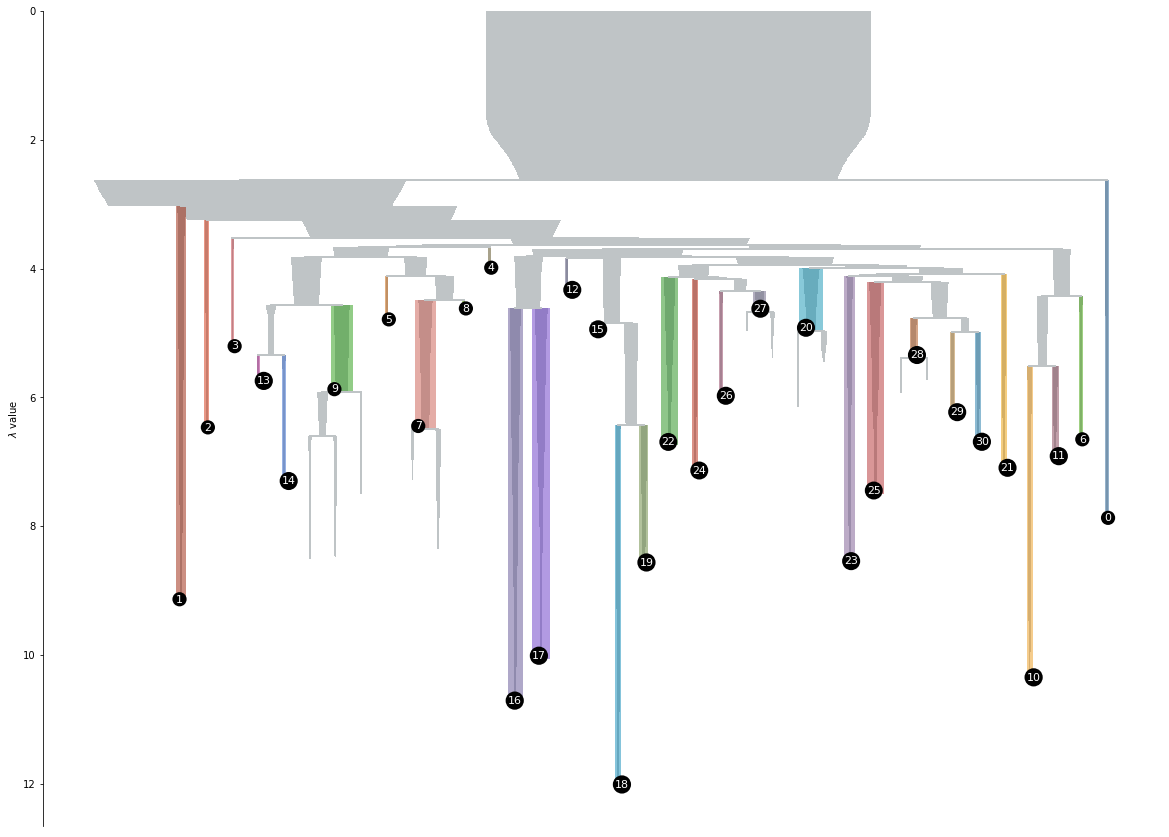

In [131]:
import matplotlib
import matplotlib.pyplot as plt
myNewColors =['#2E6697', '#9B2006', '#D23310', '#C23E45', '#928151', '#C35E03', '#43A209', '#CA5A4E', '#61A801', '#269B11', '#ED9A1A', '#854154', '#575377', '#A71A83', '#3366CC', '#9B1109', '#605295', '#6636C6', '#0C8BB9', '#66873A', '#1395B5', '#EB9C01', '#218E17', '#7B5891', '#B6220C', '#B42F30', '#8E3F5F', '#665F80', '#AD4E13', '#B17B2D', '#1D78A8', '#DD6511', '#AAAA11', '#676E15', '#A8167A', '#628871']
import matplotlib.colors

plt.rcParams['figure.figsize'] = [20,15]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#bfc4c6","#bfc4c6","#bfc4c6"])

tree = clusterer.condensed_tree_.plot(cmap = cmap,select_clusters=True,label_clusters = True, selection_palette=myNewColors, 
                               colorbar = False,max_rectangles_per_icicle=80, alpha=0.5,barwidthfactor=15,linecolor='#bfc4c6',linewidth=2)
plt.savefig('clustering_tree_full_ref.png', dpi=300)

## Plot and save a graphic for each cluster on its own.

In [86]:
%%R -i df -o n --width 800 --height 800 -r 140

library(hrbrthemes)
library(ggplot2)
library(fields)
library(plyr)

library(showtext)
font_add_google(name = "Source Sans Pro", family = "Source Sans Pro", regular.wt = 600, bold.wt = 700)
showtext_auto()

options(warn=0)# 0 zum anschalten
myGray <- c('#95a5a6')
myNewColors <- c('#2E6697', '#9B2006', '#D23310', '#C23E45', '#928151', '#C35E03', '#43A209', '#CA5A4E', '#61A801', '#269B11', '#ED9A1A', '#854154', '#575377', '#A71A83', '#3366CC', '#9B1109', '#605295', '#6636C6', '#0C8BB9', '#66873A', '#1395B5', '#EB9C01', '#218E17', '#7B5891', '#B6220C', '#B42F30', '#8E3F5F', '#665F80', '#AD4E13', '#B17B2D', '#1D78A8', '#DD6511', '#AAAA11', '#676E15', '#A8167A', '#628871')

#Get the cluster means:
means <- aggregate(df[,c("x","y")], list(df$cluster), median)
means <- data.frame(means) 
n=nrow(means)

means <- means[-1,]

myPal <- append(myGray,myNewColors)


df$density <- fields::interp.surface(
  MASS::kde2d(df$x, df$y), df[,c("x","y")])

for (n_cluster in 1:n+1){#s

p <- ggplot()+
theme_minimal()+
theme(panel.border=element_blank(),panel.grid.major = element_line(colour = "lightgrey",linetype="dotted"),panel.grid.minor = element_blank())+
geom_point(data=df, aes(x=df$x, y=df$y, color= as.factor(df$cluster)),pch=20,cex=1.6, alpha = 0.02)+
scale_color_manual(values = myPal)+
geom_point(data = subset(df, cluster == n_cluster-1), aes(x=x, y=y), color= myNewColors[n_cluster], 
pch=20,cex=1.6, alpha = 0.8)+
guides(alpha=FALSE, color=FALSE)+
geom_point(data=means, aes(x=means$x, y=means$y), color= head(myNewColors, n-1), alpha = 0.3,size =6)+
geom_point(data=means, aes(x=means$x[n_cluster], y=means$y[n_cluster]), color= myNewColors[n_cluster], alpha = 1,size =6)+

annotate("text", x = means[,c("x")], y = means[,c("y")], label = means[,c("Group.1")], color="white", fontface="bold",  size=8.2, parse = TRUE, hjust=0.5)+
labs(x="", y="",
       title="")+
theme(plot.margin = margin(0, 0.5, 0.5, 0.5, "cm"))+
coord_fixed()+

annotate(x=-16.5, xend=-16.5, y=-16.5, yend=-15, lwd=1,lineend = "square", geom="segment") +
annotate(x=-16.5, xend=-15, y=-16.5, yend=-16.5, lwd=1,lineend = "square", geom="segment") +
annotate("text", x = -16.5, y = -17, label = 'UMAP-X', color="black", fontface="bold",  size=8.2, parse = TRUE, hjust=0) +
annotate("text", x = -17, y = -16.5, label = 'UMAP-Y', color="black", fontface="bold",  size=8.2, parse = TRUE, hjust=0,
             angle = 90)
theme(text = element_text(family = "Source Sans Pro",  size=8.2))

filename <- paste("report/img/Cluster_Nr_",n_cluster-1,".png",sep="")
p
ggsave(filename,last_plot())

}




## Plot and save a temporal graph for each cluster on its own.

In [118]:
year_freqs = pd.DataFrame(drc.groupby(['cluster','year']).size().reset_index())

year_freqs = year_freqs.rename(columns={0: "count"})
print(year_freqs)

      cluster  year  count
0          -1  1934      1
1          -1  1935      1
2          -1  1942      1
3          -1  1946      1
4          -1  1948      2
5          -1  1951      1
6          -1  1956     16
7          -1  1957     11
8          -1  1958     20
9          -1  1959     14
10         -1  1960      7
11         -1  1961     13
12         -1  1962     23
13         -1  1963     20
14         -1  1964     33
15         -1  1965     34
16         -1  1966     50
17         -1  1967     61
18         -1  1968     49
19         -1  1969     54
20         -1  1970     75
21         -1  1971     66
22         -1  1972     90
23         -1  1973     76
24         -1  1974     96
25         -1  1975    184
26         -1  1976    202
27         -1  1977    189
28         -1  1978    218
29         -1  1979    252
...       ...   ...    ...
1453       30  1989     18
1454       30  1990      9
1455       30  1991     15
1456       30  1992      8
1457       30  1993     11
1

In [126]:
%%R -i year_freqs,n --width 700 --height 300
library(hrbrthemes)
library(showtext)
font_add_google(name = "Source Sans Pro", family = "Indie Flower", regular.wt = 600, bold.wt = 700)
showtext_auto()
myNewColors <- c('#2E6697', '#9B2006', '#D23310', '#C23E45', '#928151', '#C35E03', '#43A209', '#CA5A4E', '#61A801', '#269B11', '#ED9A1A', '#854154', '#575377', '#A71A83', '#3366CC', '#9B1109', '#605295', '#6636C6', '#0C8BB9', '#66873A', '#1395B5', '#EB9C01', '#218E17', '#7B5891', '#B6220C', '#B42F30', '#8E3F5F', '#665F80', '#AD4E13', '#B17B2D', '#1D78A8', '#DD6511', '#AAAA11', '#676E15', '#A8167A', '#628871')
# print(year_freqs)
library(ggplot2)


for (n_cluster in 0:30){#s
p <- ggplot(subset(year_freqs, cluster ==n_cluster), aes(x=year,y=count))+
geom_smooth(size=1.5,span = 0.3, alpha=0.6,color= myNewColors[n_cluster+1])+

geom_point()+
labs(y="NO. OF PAPERS", x="YEAR",
title="Temporal Distribution of the Data",
subtitle="") + 
theme_classic()+
theme(panel.grid.major = element_line(colour = "grey", linetype="dotted", size=0.55),panel.grid.minor = element_blank())+
theme(text = element_text(family = "Indie Flower",  size=40))


filename <- paste("report/img_time/Cluster_Nr_",n_cluster,".png",sep="")
p
ggsave(filename,last_plot(),width=7,height=3,dpi=300)
}

## Load full temporal distributions and plot them

In [172]:
full_freqs = pd.DataFrame(drc['year'].value_counts()).reset_index().sort_values(by='year',ascending=True)#)groupby(['cluster','year']).size().reset_index())

In [3]:
filtered = pd.read_csv('filtered_out.csv')
filtered_freqs = pd.DataFrame(filtered['year'].value_counts()).reset_index().sort_values(by='year',ascending=True)#)groupby(['cluster','year']).size().reset_index())

In [5]:
pp = pd.read_csv('pp_over_time.csv')

In [179]:
%%R -i full_freqs,pp,filtered_freqs --width 700 --height 500
library(hrbrthemes)
print(full_freqs)
library(ggplot2)
library(showtext)
font_add_google(name = "Source Sans Pro", family = "Indie Flower", regular.wt = 600, bold.wt = 700)
showtext_auto()

p <- ggplot()+
geom_smooth(data=pp, aes(x=year,y=count/sum(count)), color='#074ba9',size=1,span = 0.3, alpha=0.6,se=F)+
geom_point(data=pp, aes(x=year,y=count/sum(count)),fill='#074ba9',colour="black",pch=21, alpha=0.6)+



# geom_smooth(data=filtered_freqs, aes(x=index,y=year/sum(year)), color='#333F4C',size=1.5,span = 0.3, alpha=0.6,se=F)+
# geom_point(data=filtered_freqs, aes(x=index,y=year/sum(year)),fill='#333F4C',colour="black",pch=21)+

geom_smooth(data=full_freqs, aes(x=index,y=year/sum(year)), color='#ff7f0e',size=1,span = 0.3, alpha=0.6,se=F)+
geom_point(data=full_freqs, aes(x=index,y=year/sum(year)),fill='#ff7f0e',colour="black",pch=21, alpha=0.6)+


labs(y="SHARE OF PAPERS", x="YEAR",
title="TEMPORAL DISTRIBUTION OF THE WOS-SAMPLE AND THE PHILPAPERS-DATA",
subtitle="") + 
theme_classic()+
theme(panel.grid.major = element_line(colour = "grey", linetype="dotted", size=0.55),panel.grid.minor = element_blank())+
theme(text = element_text(family = "Indie Flower"))

p

ggsave('tempplot1.pdf', plot = last_plot(),width=7,height=3,dpi=300)
